# 位置集中的风险

By Maxwell Margenot and Delaney Granizo-Mackenzie.

Part of the Quantopian Lecture Series:

www.quantopian.com/lectures
github.com/quantopian/research_public



交易时，分散风险是很重要的。通过将你的头寸集中在少数几种资产上，你可能会受到它们的风险的负面影响。这个笔记本的目的是显示如何多样化你的投资组合可以导致一个较低的整体风险概况。

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## 直觉

假设你在玩21点时学会了算牌，而如果你被抓住了，大多数赌场会把你扔出去，因为这将给你[比赌场多1%的优势](https://en.wikipedia.org/wiki/Card_counting)。如果你带着1万美元走进赌场，把所有的钱都押在一款游戏上显然是疯狂的。虽然你有51%的机会赢得这场比赛，但庄家仍然有49%的机会。预期的结果是你赢了这场比赛，但方差高得令人难以置信。

假设你把钱放在100张不同的桌子上。这称为独立押注，因为一个表的结果不会影响其他表。当你押更多的注时，你的方差会减少。你仍然期望赢得51%的赌桌，但是赔钱的机会大大减少了。让我们看看它是如何运作的。

### 模拟21点游戏

每场比赛都有51%的胜率。我们可以使用二项分布来模拟这种情况，二项分布是用我们执行的试验次数(游戏)和每次试验成功的机会来参数化的。

首先，我们将模拟1000个不同的宇宙，你走进赌场，玩一个游戏。

In [2]:
universes = 1000

results = np.zeros((universes, 1))
for i in range(universes):
    results[i] = np.random.binomial(n = 1, p=0.51)

现在让我们检查结果的均值和标准差。因为0和1太多了，而0和1之间什么都没有，所以标准差很高。这就是说，你应该期望赢得半局比赛，潜在的结果大致平均地分布在输赢之间。因为你玩的游戏太少，所以你没有时间发挥你的优势.

In [3]:
np.mean(results), np.std(results)

(0.511, 0.49987898535545583)

现在让我们模拟1000个你走进赌场并玩100个游戏的宇宙。

In [4]:
universes = 1000

results = np.zeros((universes, 1))
for i in range(universes):
    results[i] = np.random.binomial(n = 100, p=0.51)

np.mean(results), np.std(results)

(51.139, 4.805796396020122)

现在我们看到平均结果更接近51场胜利，标准差更小。我们在这里看到，你可能仍然不安全，因为你的预期优势只有一个游戏，而标准差是许多游戏。这意味着你输的比赢的要多。最后让我们来试试10000个游戏。

In [5]:
universes = 1000

results = np.zeros((universes, 1))
for i in range(universes):
    results[i] = np.random.binomial(n = 10000, p=0.51)

np.mean(results), np.std(results)

(5101.365, 48.84606202141581)

在这种情况下，我们更安全，因为预期的优势是100个游戏。

注意:这里有一个微妙之处，即使用标准差并不总是有效的，因为在这种情况下，数据的底层分布是不正态的。我们之所以在这里使用它，是因为标准差是金融中使用的波动性指标，它仍然反映了数据中存在的“利差”。在实践中，要注意不要假设基础数据是正态的，从而滥用标准偏差。

## 扩展到投资组合理论

同样的原理也存在于投资组合理论中。如果你认为自己在挑选上涨或下跌的股票方面比市场更有优势，那么你应该尽可能多地进行独立押注。这可以通过投资尽可能多的不相关资产来实现。让我们看一个例子。

记住，在金融领域，波动性是由一个时间序列的标准偏差来衡量的，而投资组合未来风险的大小是由过去的投资组合波动性来估计的。

#### 案例1:投资很少的资产

让我们通过从正态分布中抽样来模拟一些资产。

注:在实际操作中，实际金融资产收益很少是正态分布的，因此这不是一个很好的假设。然而，在这里我们可以把我们的观点表达出来，因为我们只关心相关性和多样性的水平。

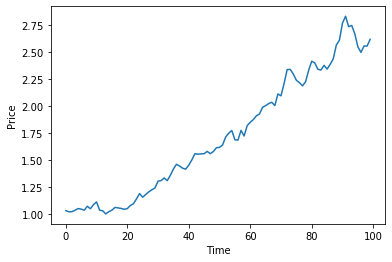

In [6]:
R_1 = np.random.normal(1.01, 0.03, 100)
A_1 = np.cumprod(R_1)
P = A_1
plt.plot(P)
plt.xlabel('Time')
plt.ylabel('Price');

在这种情况下，我们完全暴露于这种资产的波动性，因为我们的投资组合完全是这种资产。

#### 案例2:投资于许多相关资产

在这种情况下，我们扩大了资产池，但回报率之间仍存在大量的两两相关关系。我们通过将资产2到N模拟为资产1加上一些噪声来模拟它.

Asset Volatilities
[0.027019260137361452, 0.02937955438862733, 0.030710355741481697, 0.030091625692874605, 0.029521400164365198, 0.028957447136388974, 0.02933138530008169, 0.02972848221374281, 0.029413582167622132, 0.027766945637036987]
Mean Asset Volatility
0.02919200385795829
Portfolio Volatility
0.027754931250856343


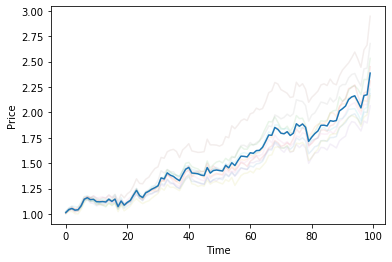

In [7]:
N = 10

returns = np.zeros((N, 100))
assets = np.zeros((N, 100))

R_1 = np.random.normal(1.01, 0.03, 100)
returns[0] = R_1
assets[0] = np.cumprod(R_1)
plt.plot(assets[0], alpha=0.1)

for i in range(1, N):
    R_i = R_1 + np.random.normal(0.001, 0.01, 100)
    returns[i] = R_i
    assets[i] = np.cumprod(R_i)
    plt.plot(assets[i], alpha=0.1)

R_P = np.mean(returns, axis=0)
P = np.mean(assets, axis=0)
plt.plot(P)
plt.xlabel('Time')
plt.ylabel('Price');

print('Asset Volatilities') 
print ([np.std(R) for R in returns])
print ('Mean Asset Volatility')
print (np.mean([np.std(R) for R in returns]))
print ('Portfolio Volatility')
print (np.std(R_P))

这里你可以看到投资组合伴随着所有的资产，这些资产被画得更软了。需要注意的重要一点是，投资组合经历了与资产相同的所有冲击，因为当一种资产上涨或下跌时，其他所有资产也可能如此。这就是相关资产的问题。让我们来看看资产的波动性和投资组合的波动性。

我们资产的平均波动率与投资组合的波动率相同。我们再下更多的赌注没有得到任何好处。你可以把相关押注想象成与最初的押注相同。如果第二次押注的结果和第一次押注的结果是相关的，那么实际上你只是押了两次同样的注，你并没有降低波动性。

#### 案例3:投资于许多不相关的资产

在这种情况下，我们独立地产生了一堆资产一个组合了所有资产的投资组合。

Asset Volatilities
[0.03020360392128378, 0.03228787687507558, 0.02888814587517391, 0.02888714367824635, 0.025143597802341704, 0.03069861309647305, 0.029306938162081863, 0.03338985304874321, 0.030737122159454216, 0.030403385680168694]
Mean Asset Volatility
0.029994628029904234
Portfolio Volatility
0.00885429315325793


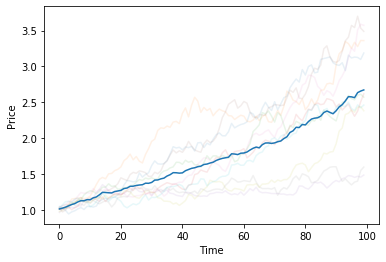

In [8]:
N = 10

assets = np.zeros((N, 100))
returns = np.zeros((N, 100))

for i in range(N):
    R_i = np.random.normal(1.01, 0.03, 100)
    returns[i] = R_i
    assets[i] = np.cumprod(R_i)
    plt.plot(assets[i], alpha=0.1)

R_P = np.mean(returns, axis=0)
P = np.mean(assets, axis=0)
plt.plot(P)
plt.xlabel('Time')
plt.ylabel('Price');

print('Asset Volatilities') 
print ([np.std(R) for R in returns])
print ('Mean Asset Volatility')
print (np.mean([np.std(R) for R in returns]))
print ('Portfolio Volatility')
print (np.std(R_P))

现在我们看到了多样化的好处。持有更多不相关的资产会使我们的投资组合更加平滑。当一个向下时，其他的就不太可能向下了，所以向上和向下的碰撞往往要小得多。我们持有的资产越多，波动性也就越小。让我们检查。

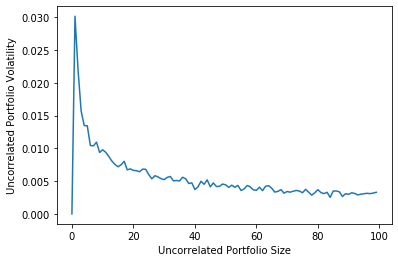

In [9]:
portfolio_volatilities_by_size = np.zeros((100,1))

for N in range(1,100):

    assets = np.zeros((N, 100))
    returns = np.zeros((N, 100))

    for i in range(N):
        R_i = np.random.normal(1.01, 0.03, 100)
        returns[i] = R_i

    R_P = np.mean(returns, axis=0)

    portfolio_volatilities_by_size[N] = np.std(R_P)
    
plt.plot(portfolio_volatilities_by_size)
plt.xlabel('Uncorrelated Portfolio Size')
plt.ylabel('Uncorrelated Portfolio Volatility');

## 最后一点

尽可能多地投资于不相关的资产。在金融领域，这被称为多样化。如果你有一个定价模型，给所有东西定价，然后相应地投资。这一概念将在多空股票讲座中进行解释。

### 资本约束

由于交易成本，你需要有一定的最低限度的资本投入大量的资产。因此，有时你无法投资成百上千的股票。在这种情况下，你仍然应该努力最大化你的投资组合规模，记住，如果你的投资组合规模为20，你仍然可以找到20种相对不相关的资产，这总比没有好。

## 现在让我们用数学而不是图片来解释

现代投资组合理论的一个关键方面是，通过将多种资产组合成一个投资组合，可以降低整个组合的整体风险。由于我们用资产的标准偏差来表示资产的波动性，我们可以很容易地用数学方法来表示。

假设我们的投资组合中有两种资产，$S_1$和$S_2$，其权重为$\omega_1$和$\omega_2$，使$\omega_1 + \omega_2 = 1$。将投资组合称为$P$，并说$S_1$和$S_2$分别有均值和标准差：$\mu_1$、$\sigma_1$和$\mu_2$、$\sigma_2$。我们可以很容易地计算出$P$的价值。

$$ P = \omega_1 S_1 + \omega_2 S_2 $$

现在，我们将$\mu_P$设置为投资组合$P$的回报。计算该投资组合的预期收益很简单:

$$ E[\mu_P] = E[\omega_1 \mu_1 + \omega_2 \mu_2] = \omega_1 E[\mu_1] + \omega_2 E[\mu_2] $$

正如您所看到的，整个投资组合的预期收益可以直接使用投资组合中的资产的预期收益及其相关的权重来确定。类似地，我们可以使用这些相同的特征来确定投资组合的整体风险，$\sigma_p$。首先，我们计算投资组合的方差，$\sigma_p^2 = VAR[P]$。然后我们说，$S_1$和$S_2$之间的关联是$COR[S_1,S_2] = \frac{COV[S_1,S_2]}{\sigma_1\sigma_2} = \rho_{12}$。计算结果如下:

\begin{eqnarray}
\sigma_p^2 &=& VAR[P] \\
    &=& VAR[\omega_1 S_1 + \omega_2 S_2] \\
    &=& VAR[\omega_1 S_1] + VAR[\omega_2 S_2] + COV[\omega_1 S_1,\omega_2 S_2] \\
    &=& \omega_1^2 VAR[S_1] + \omega_2^2 VAR[S_2] + 2\omega_1\omega_2 COV[S_1,S_2] \\
    &=& \omega_1^2 \sigma_1^2 + \omega_2^2 \sigma_2^2 + 2\rho_{12}\omega_1\omega_2\sigma_1\sigma_2
\end{eqnarray}

In [10]:
stocks = np.array([100, 75])
mean_returns = np.array([4, 6])

r_12 = 0.20
cov_12 = r_12 * 0.05 * 0.08
covariance_matrix = np.array([[0.05**2,cov_12],[cov_12,0.08**2]])

weights = np.array([0.7, 0.3])

P = np.dot(weights, stocks.T)

现在我们将计算投资组合的整体风险:

In [11]:
var_p = np.dot(np.dot(weights, covariance_matrix), weights.T)
sigma_p = np.sqrt(var_p)
print("The overall risk of the portfolio is: ", sigma_p) 

The overall risk of the portfolio is:  0.04622769732530488


通过将资产组合成一个投资组合，我们能够创建一个整体风险低于单个资产的组合。如果我们在投资组合中包含更多的资产，我们就可以进一步降低对任何单个资产的风险敞口。

## 额外押注的好处

我们可以很容易地将这个概念扩展到由$n$个证券组成的投资组合。你的投资组合中包含的资产越多，你的整体风险就越低。这里是你的投资组合方差的一般形式，在你有$n$个资产的情况下:

$$ \sigma_p^2 = \sum_i \omega_i^2 \sigma_i^2 + \sum_i\sum_{j\neq i} \omega_i\omega_j\sigma_i\sigma_j\rho_{ij}, \ i, j \in \lbrace 1,\ldots, n\rbrace $$

通过确保您的资产彼此独立，可以增加这些好处。当两个资产是独立的，它们是不相关的，即$\rho_{ij}=0$。在确定投资组合方差的计算中，每一对资产之间的相关性起着非常重要的作用。资产之间的相关性越高，我们需要包含的资产就越多，这样我们的风险就会相应降低。

In [12]:
stocks = np.array([230, 176, 192, 105])
mean_returns = np.array([2.0, 3.5, 7.5, 5.0])
std_dev = np.array([0.05, 0.07, 0.11, 0.09])
weights = np.array([0.35, 0.30, 0.15, 0.20])


r_12 = 0.2
r_13 = 0.08
r_14 = 0.1
r_23 = 0.6
r_24 = 0.4
r_34 = 0.8
covariance_matrix = np.array([[0.05**2, r_12 * 0.05 * 0.07, r_13 * 0.05 * 0.11, r_14 * 0.05 * 0.09],
                             [r_12 * 0.05 * 0.07, 0.07**2, r_23 * 0.07 * 0.11, r_24 * 0.07 * 0.09],
                             [r_13 * 0.05 * 0.11, r_23 * 0.07 * 0.11, 0.11**2, r_34 * 0.11 * 0.09],
                             [r_14 * 0.05 * 0.09, r_24 * 0.07 * 0.09, r_34 * 0.11 * 0.09, 0.09**2]])


In [13]:
var_p = np.dot(np.dot(weights, covariance_matrix), weights.T)
sigma_p = np.sqrt(var_p)
print ("The overall risk of the portfolio is: ", sigma_p)

The overall risk of the portfolio is:  0.052849787132967715


现在我们假设所有这些资产之间的相关性是$0$，它们都是成对独立的。我们假设其他一切都和以前一样。利用我们对投资组合风险的计算，我们得到:

In [14]:
covariance_matrix = np.array([[0.05**2, 0, 0, 0],
                             [0, 0.07**2, 0, 0],
                             [0, 0, 0.11**2, 0],
                             [0, 0, 0, 0.09**2]])
var_p = np.dot(np.dot(weights, covariance_matrix), weights.T).flatten()
sigma_p = np.sqrt(var_p)
print("The overall risk of the portfolio is: ", sigma_p) 

The overall risk of the portfolio is:  [0.03665379]


我们能够通过选择相互独立的资产来显著降低投资组合的整体风险。虽然你仍然可以通过增加相关资产来降低风险，但你需要增加更多的资产才能达到与不相关资产相同的效果。

下面的函数将允许你随机生成一个任意长度的投资组合:

In [15]:
# Generate an almost entirely random portfolio
# Only constraint is that an asset's variance
def generate_portfolio(n ):
    assets = np.random.normal(100, 20, n)
    weights = np.random.uniform(0, 1, n)
    weights = weights/sum(weights)
    returns = np.random.normal(5, 2, n) # Say that 5 is the average return for our assets
    # Generate covariance matrix for assets
    cov_matrix = np.ndarray(shape = (n, n))
    std_dev = np.zeros(n)
    for i in range(n):
        for j in range(i + 1):
            if j == i:
                std_dev[i] = returns[i]/100
                cov_matrix[i][j] = std_dev[i]**2
            else:
                cov_matrix[i][j] = np.random.uniform(-1, 1)
                cov_matrix[j][i] = cov_matrix[i][j]
    # Ensures that the covariance matrix is symmetric
    # Serves the double purpose of squaring the volatility (already present in the matrix) so we get variance
    return weights, assets, returns, std_dev, cov_matrix

We can now use this function to randomly generate a set of assets, each with a different return, as well as a covariance matrix of the assets.

In [16]:
w, S, mu, sigma, cov = generate_portfolio(6)
print("Weights:\n", w) 
print ("Assets:\n", S)
print ("Returns:\n", mu)
print ("Volatilities:\n", sigma)
print ("\nCovariance Matrix:\n", cov)

Weights:
 [0.24664511 0.17650149 0.1228126  0.21207238 0.00658628 0.23538214]
Assets:
 [108.57817403 134.21909956 121.41031591 139.75270475  69.7639052
  99.33537023]
Returns:
 [5.46508557 9.30613646 5.42729486 4.79468082 5.93813024 7.42740656]
Volatilities:
 [0.05465086 0.09306136 0.05427295 0.04794681 0.0593813  0.07427407]

Covariance Matrix:
 [[ 0.00298672  0.29097469  0.82002481 -0.61871041  0.51283189  0.56687104]
 [ 0.29097469  0.00866042  0.139902    0.53592565  0.65007749  0.92616159]
 [ 0.82002481  0.139902    0.00294555  0.40388362 -0.51913524 -0.36876655]
 [-0.61871041  0.53592565  0.40388362  0.0022989   0.82557645  0.56390372]
 [ 0.51283189  0.65007749 -0.51913524  0.82557645  0.00352614 -0.64259278]
 [ 0.56687104  0.92616159 -0.36876655  0.56390372 -0.64259278  0.00551664]]


现在，我们可以很容易地进行与以前相同的计算来确定整体投资组合的价值和风险。

In [17]:
P = np.dot(w, S)
var_p = np.dot(np.dot(w, cov), w.T)
sigma_p = np.sqrt(var_p)
print ("Portfolio Value: ", P)
print ("Portfolio Volatility: ", sigma_p)

Portfolio Value:  118.85980875727452
Portfolio Volatility:  0.5087453294585392


请记住，如果您选择更改此函数，则必须包含一些故障保险，以便更高的回报总是对应更高的波动。这是投资组合理论的核心假设之一，尽管由于我们的任意权重值与此无关，但它对于计算最优投资组合的权重是至关重要的。